In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
f=pd.read_excel('A-3.xlsx')
f.head()

,Year,Temperature(ºC),Precipitation(mm),Pressure(hPa),El Nino
0,1951,26.1,43.0,1009.5,True
1,1952,24.5,10.0,1010.9,False
2,1953,24.8,4.0,1010.7,True
3,1954,24.5,0.0,1011.2,False
4,1955,24.1,2.0,1011.9,False


In [3]:
#P1
print('Median =', f['Precipitation(mm)'].median(), 'mm')
pre_q=f['Precipitation(mm)'].quantile([.25,.5,.75])
print('Trimean =', (pre_q[.25]+2*pre_q[.5]+pre_q[.75])/4, 'mm')
print('Mean =', f['Precipitation(mm)'].mean(), 'mm')

Median = 2.0 mm
Trimean = 2.75 mm
Mean = 12.947368421052632 mm


In [4]:
#P2
print('MAD =', (f['Pressure(hPa)']-f['Pressure(hPa)'].median()).abs().median(),'hPa')
#pandas library의 MAD는 mean absolute deviation이라 다른 방법을 사용함.
print('IQR =', f['Pressure(hPa)'].quantile(.75)-f['Pressure(hPa)'].quantile(.25),'hPa')
print('STD =', f['Pressure(hPa)'].std(),'hPa')

MAD = 0.39999999999997726 hPa
IQR = 0.7499999999998863 hPa
STD = 0.8798923379117486 hPa


In [5]:
#P3

In [6]:
#P4
tem_q=f['Temperature(ºC)'].quantile([.25,.5,.75])
print('Yule-Kendal=',((tem_q[.25]-2*tem_q[.5]+tem_q[.75])/(tem_q[.75]-tem_q[.25])))
print('Skewness=',f['Temperature(ºC)'].skew())

Yule-Kendal= 0.08571428571428526
Skewness= 0.9740255878480163


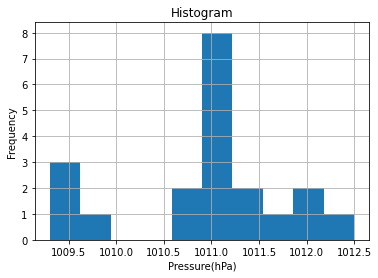

In [7]:
#P5_histogram
f['Pressure(hPa)'].hist()
plt.xlabel('Pressure(hPa)')
plt.title('Histogram')
plt.ylabel('Frequency')
plt.savefig('P5_hist.png')
plt.show()

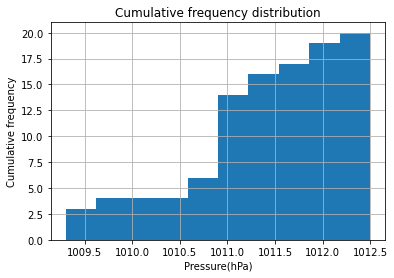

In [8]:
#P5_CFD
f['Pressure(hPa)'].hist(cumulative=True)
plt.xlabel('Pressure(hPa)')
plt.ylabel('Cumulative frequency')
plt.title('Cumulative frequency distribution')
plt.savefig('P5_CFD.png')
plt.show()

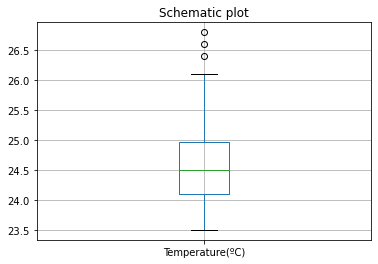

In [9]:
#P6_schematic plot
f['Temperature(ºC)'].to_frame().boxplot()
plt.title('Schematic plot')
plt.savefig('P6_schematic.png')
plt.show()

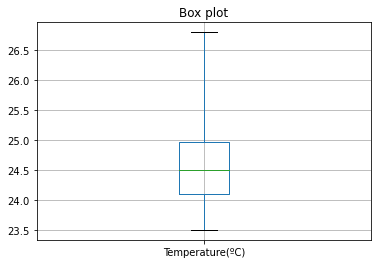

In [10]:
#P6_box plot
f['Temperature(ºC)'].to_frame().boxplot(whis=(0,100))
plt.title('Box plot')
plt.savefig('P6_box.png')
plt.show()

In [11]:
#P7
A2=pd.read_excel('A-2.xlsx').loc[:,'Precipitation (cm)']
A2.head()

0    1.1176
1    2.9972
2    6.8326
3    5.2832
4    9.2964
Name: Precipitation (cm), dtype: float64

In [12]:
#lambda = 0
A2n=np.log(A2)
print(0.0,abs((A2n.mean()-A2n.median()))/(A2n.quantile(.75)-A2n.quantile(.25)))

#lambda is positive
for i in range(1,3):
    A2n=A2**(0.5*i)
    d_lambda=abs((A2n.mean()-A2n.median()))/(A2n.quantile(.75)-A2n.quantile(.25))
    print(0.5*i,d_lambda)
    
#lambda is negative
for i in range(1,3):
    A2n=-(A2**(0.5*-i))
    d_lambda=abs((A2n.mean()-A2n.median()))/(A2n.quantile(.75)-A2n.quantile(.25))
    print(0.5*-i,d_lambda)

0.0 0.012751313998755549
0.5 0.10119988238968317
1.0 0.2177375565610858
-0.5 0.1358804560222112
-1.0 0.28225610402281653


In [13]:
#P8
P8=pd.concat([(A2**(-1.)),(A2**(-.5)),(np.log(A2)),(A2**(.5)),(A2**(1.))], axis=1,
             keys=['-1.0','-0.5','0.0','0.5','1.0'])
P8.head()

,-1.0,-0.5,0.0,0.5,1.0
0,0.894775,0.945925,0.111184,1.057166,1.1176
1,0.333645,0.577620,1.097679,1.731242,2.9972
2,0.146357,0.382567,1.921705,2.613924,6.8326
3,0.189279,0.435062,1.664532,2.298521,5.2832
4,0.107569,0.327976,2.229627,3.049000,9.2964


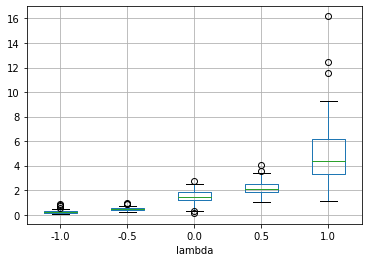

In [14]:
P8.boxplot()
plt.xlabel('lambda')
plt.savefig('P8.png')
plt.show()

In [15]:
#P9
(f['Temperature(ºC)'].where(f['Year']==1951).dropna()-f['Temperature(ºC)'].mean())/f['Temperature(ºC)'].std()

0    1.362323
Name: Temperature(ºC), dtype: float64

In [16]:
#P10
A1=pd.read_excel('A-1.xlsx',header=(0,1))
A1.head()

Date        Ithaca                     Canandaigua           \
  Unnamed: 0_level_1 precipitation Max Temp Min Temp Precipitation Max Temp   
0                  1          0.00     33.0     19.0          0.00     34.0   
1                  2          0.07     32.0     25.0          0.04     36.0   
2                  3          1.11     30.0     22.0          0.84     30.0   
3                  4          0.00     29.0     -1.0          0.00     29.0   
4                  5          0.00     25.0      4.0          0.00     30.0   

            
  Min Temp  
0     28.0  
1     28.0  
2     26.0  
3     19.0  
4     16.0

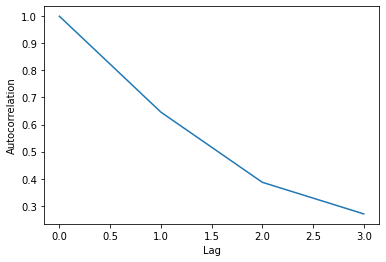

In [17]:
p10_y=[A1.loc[:,('Ithaca','Min Temp')].autocorr(lag=0),A1.loc[:,('Ithaca','Min Temp')].autocorr(lag=1),A1.loc[:,('Ithaca','Min Temp')].autocorr(lag=2),A1.loc[:,('Ithaca','Min Temp')].autocorr(lag=3)]
plt.plot(range(4),p10_y,linestyle='-')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.savefig('P10.png')
plt.show()

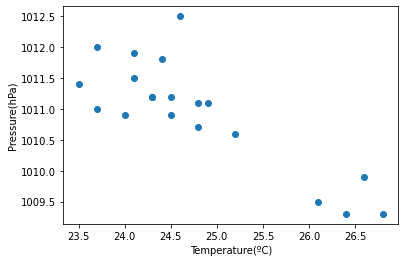

In [18]:
#P11
plt.scatter(x=f['Temperature(ºC)'],y=f['Pressure(hPa)'])
plt.xlabel('Temperature(ºC)')
plt.ylabel('Pressure(hPa)')
plt.savefig('P11.png')
plt.show()

In [19]:
#P12 Pearson correlation
f.loc[:,'Temperature(ºC)':'Pressure(hPa)'].corr(method='pearson')

,Temperature(ºC),Precipitation(mm),Pressure(hPa)
Temperature(ºC),1.000000,0.702853,-0.830452
Precipitation(mm),0.702853,1.000000,-0.677534
Pressure(hPa),-0.830452,-0.677534,1.000000


In [20]:
#P12 Spearman rank correlation
f.loc[:,'Temperature(ºC)':'Pressure(hPa)'].corr(method='spearman')

,Temperature(ºC),Precipitation(mm),Pressure(hPa)
Temperature(ºC),1.000000,0.606386,-0.688067
Precipitation(mm),0.606386,1.000000,-0.631951
Pressure(hPa),-0.688067,-0.631951,1.000000


In [21]:
#P13 on Excel